<a href="https://colab.research.google.com/github/SHIBAGYEON/da_study/blob/main/%EB%8C%80%EC%A1%B0ch08_%5B%EC%8B%A4%EC%8A%B56%5D_%EB%B0%98%EB%8F%84%EC%B2%B4_%EC%A0%9C%EC%A1%B0%EA%B3%B5%EC%A0%95_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4_pass_fail_%EC%88%98%EC%9C%A8_%EC%98%88%EC%B8%A1_%EC%88%98%EC%A0%95%EB%B3%B8_220427.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [uci-secom.csv] : https://www.kaggle.com/paresh2047/uci-semcom

#Part4. [실습6] 반도체 제조 공정 프로세스 Pass_Fail 수율 예측

* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

In [1]:
# import matplotlib.pyplot as plt

# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

# fm._rebuild()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## 01. 데이터 소개 및 분석프로세스 수립
 : "강의자료 → Ch04. [실습6] 반도체 제조 공정 프로세스 Pass_Fail 수율 예측" 참고

## 02. 데이터 준비를 위한 EDA 및 전처리

### 0. 데이터 불러오기

In [4]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [5]:
# data = pd.read_csv('/content/drive/MyDrive/강의/01_패스트캠퍼스_머신러닝실습프로젝트/실습자료/data/ch6/uci-secom.csv')
data = pd.read_csv('/content/drive/MyDrive/강의 /01_패스트캠퍼스_머신러닝실습프로젝트/실습자료/data/ch6/uci-secom.csv')
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
# 데이터의 모양 알아보기
data.shape

(1567, 592)

### 1. 데이터 탐색



#### 1) 데이터 타입

In [7]:
# 컬럼별 데이터 타입 알아보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


#### 2) 데이터 통계값

In [8]:
# 컬럼별 간단한 통계값 보기
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


#### 3) 결측값

In [9]:
data.isnull().any().any()

True

#### 4) 중복값

In [10]:
# 중복된 항목 수 알아보기
print("중복된 항목 수 :", len(data[data.duplicated()]))

중복된 항목 수 : 0


### 2. 데이터 전처리

#### 1. 결측값 채우기

In [11]:
# NaN 을 0으로 채우기
data = data.replace(np.NaN, 0)

# 결측값 확인
data.isnull().any().any()

False

### 3. Target Feature 정의



#### 1) 데이터 탐색

In [12]:
data['Pass/Fail'].unique()

array([-1,  1])

> Pie Chart

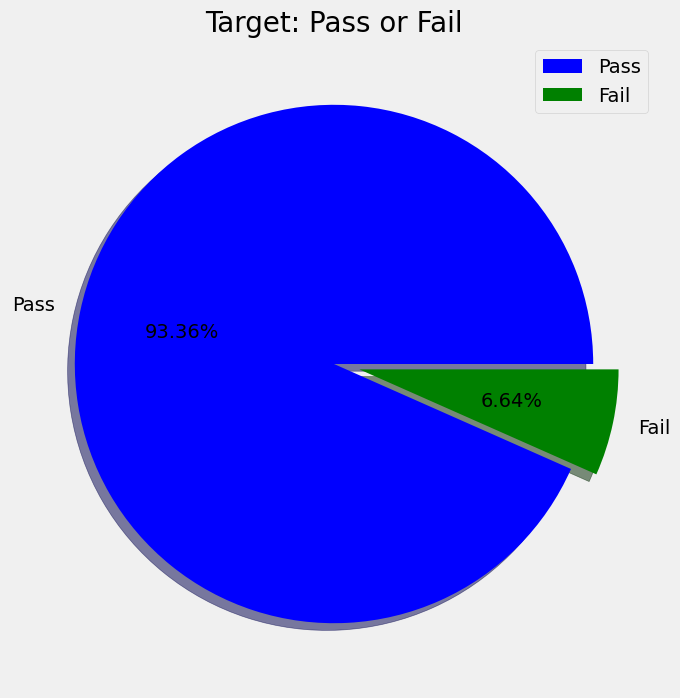

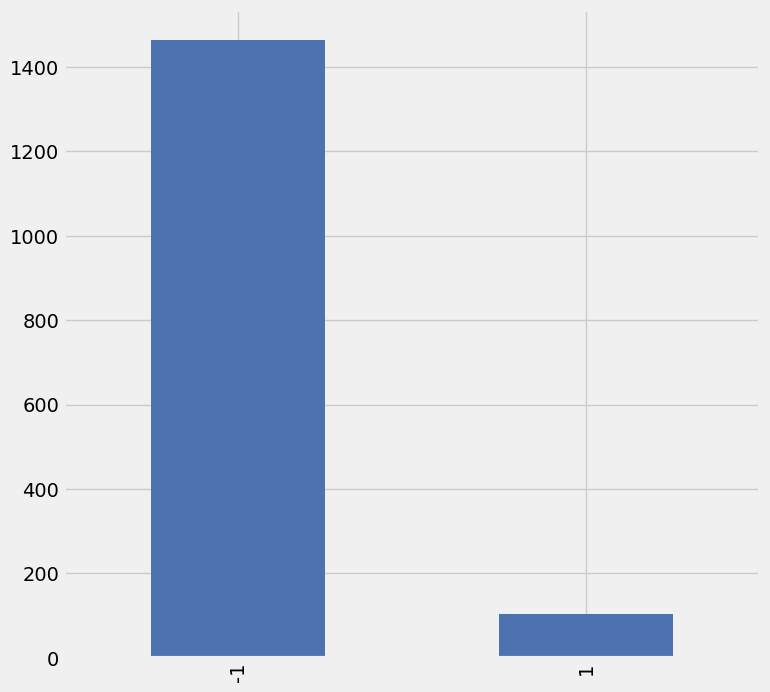

In [13]:
labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
data['Pass/Fail'].value_counts().plot(kind="bar");

* 매우 불균형한 데이터

#### 2) 각 센서별 Target Feature 분포

In [14]:
unique_vals = data['Pass/Fail'].unique()
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

In [15]:
targets

[                     Time        0        1          2          3       4  \
 0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
 1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
 3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
 4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
 5     2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334   
 ...                   ...      ...      ...        ...        ...     ...   
 1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
 1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
 1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
 1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
 1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   
 
           5         6       7       8  ...       581     582 

<ipython-input-16-78e367c6512d>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-78e367c6512d>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-16-78e367c6512d>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

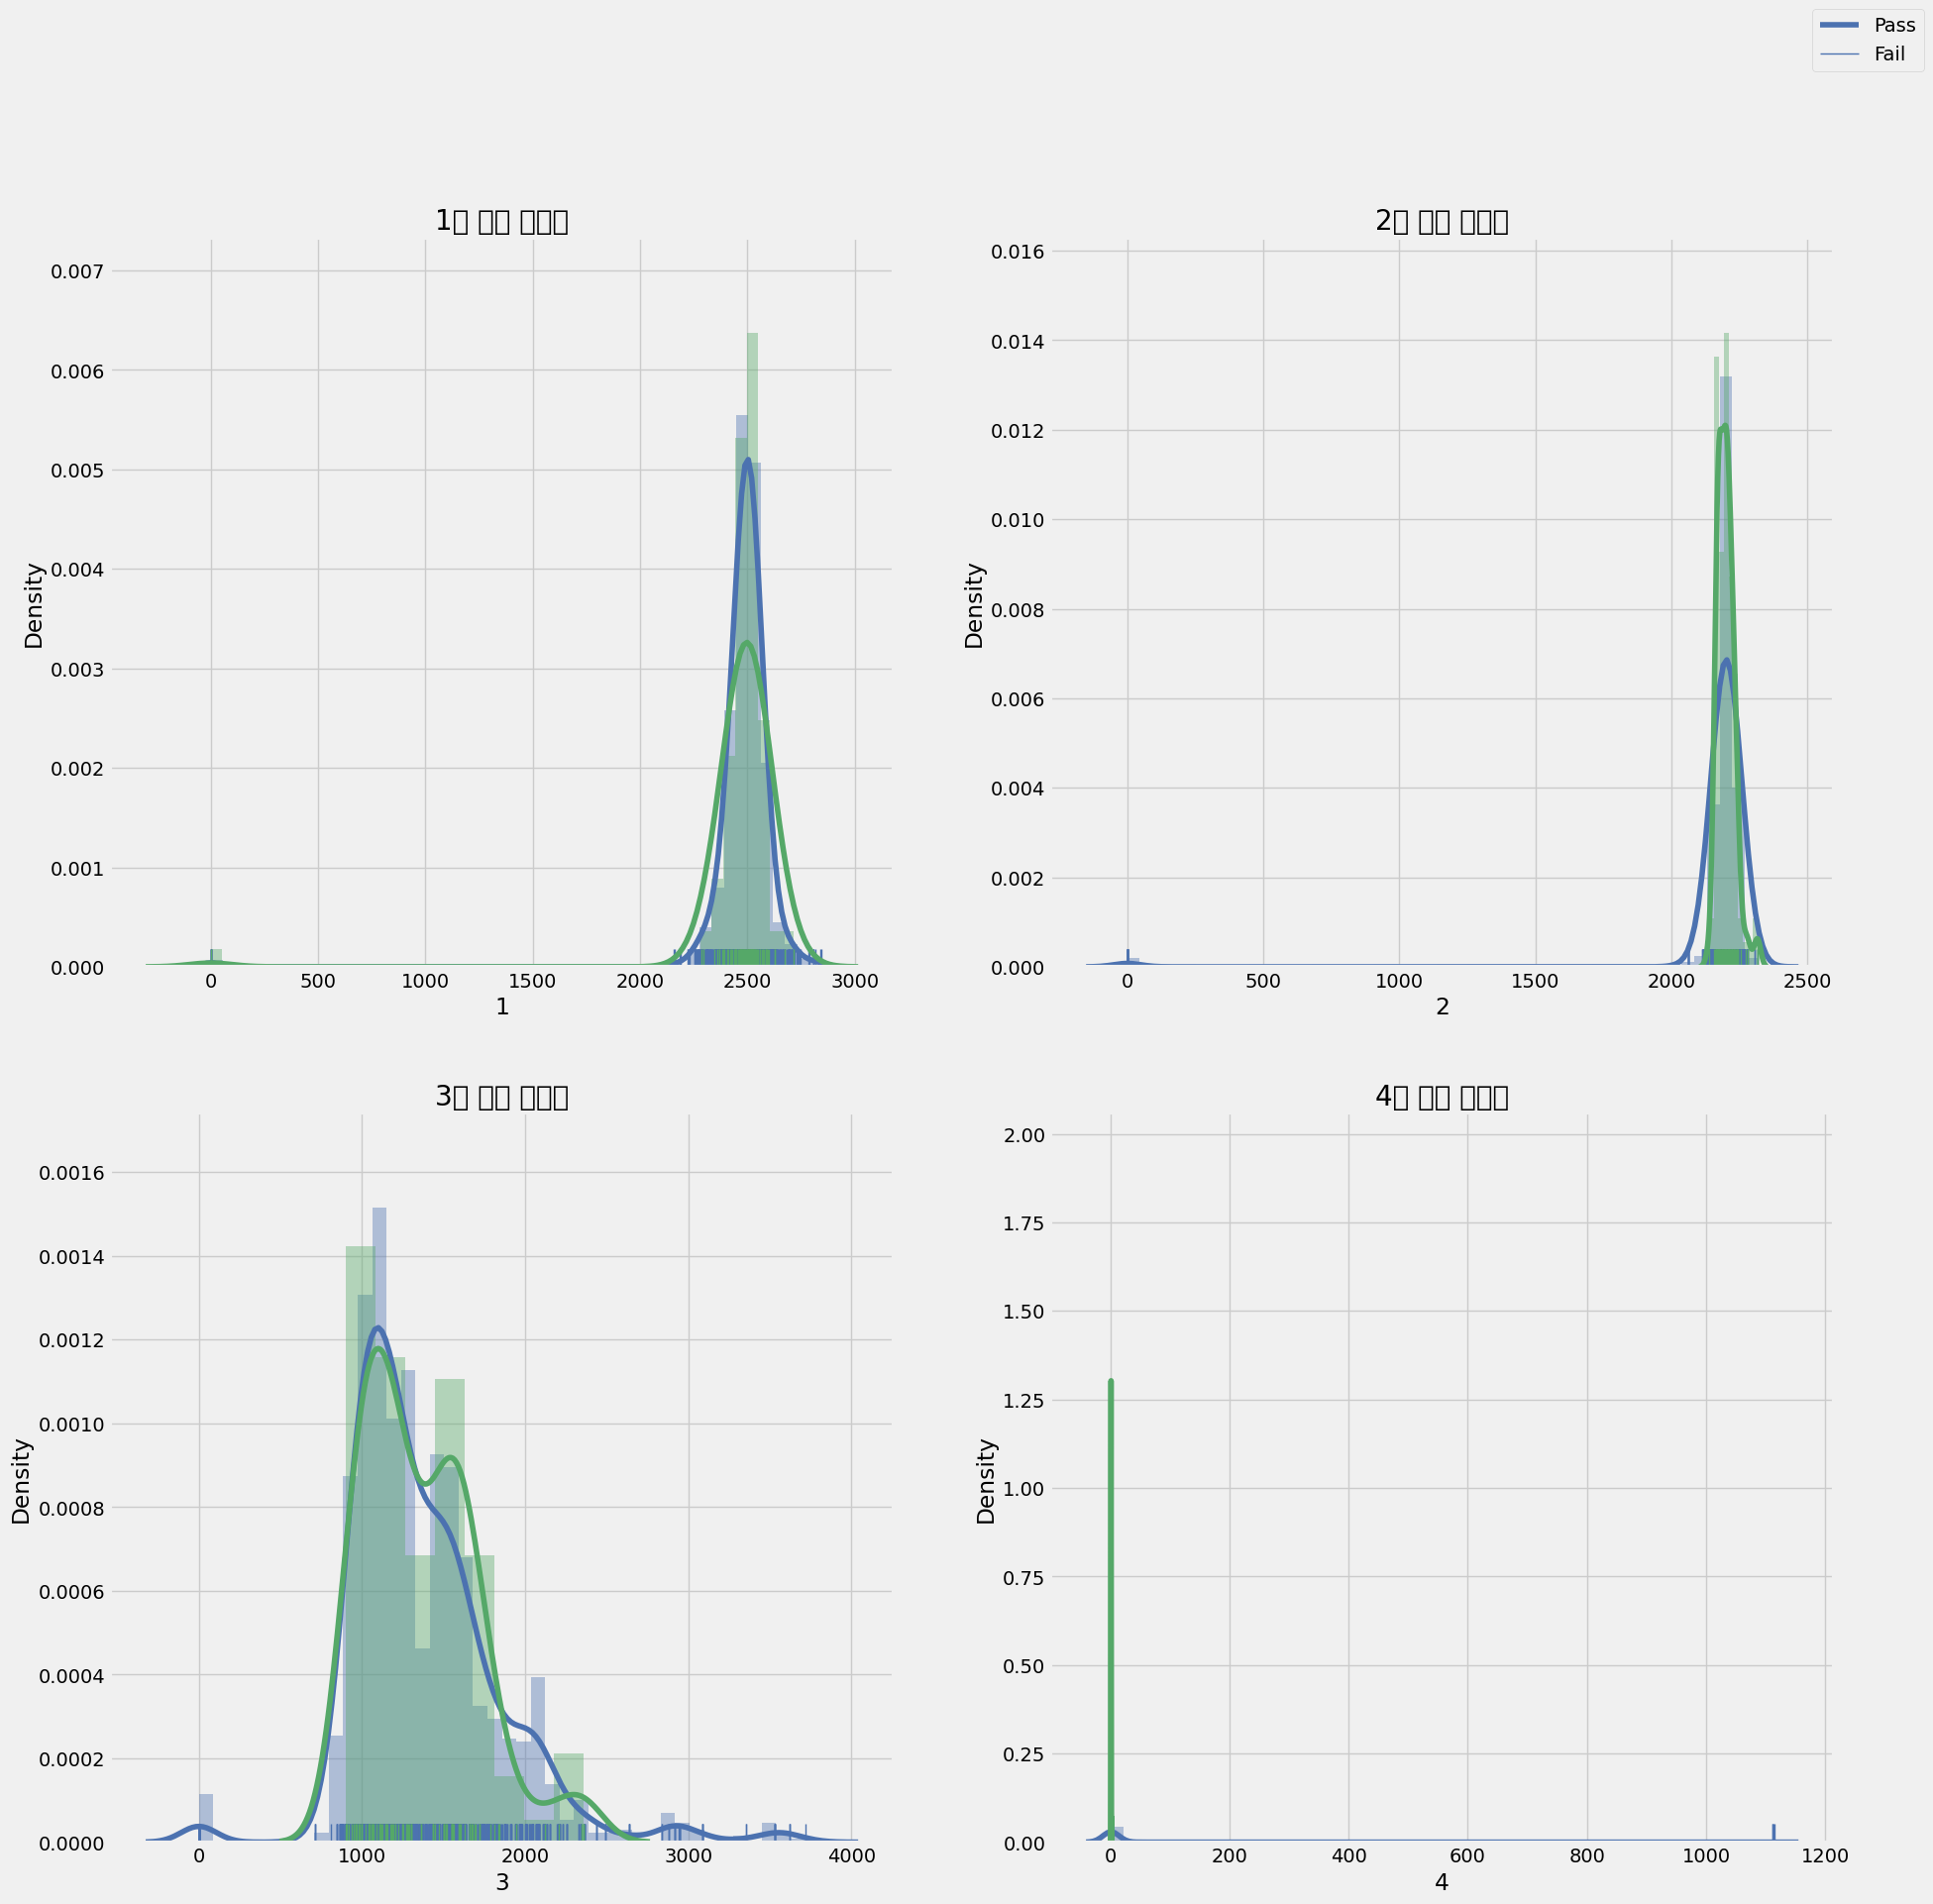

In [16]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('1번 센서 계측값', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('2번 센서 계측값', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('3번 센서 계측값', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('4번 센서 계측값', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

### 4. 상관성에 따른 Feature 정제

#### 1) 히트맵 확인

<ipython-input-17-370cc3c5edf7>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, '상관 히트맵')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 47605 (\N{HANGUL SYLLABLE MAEB}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44288 (\N{HANGUL S

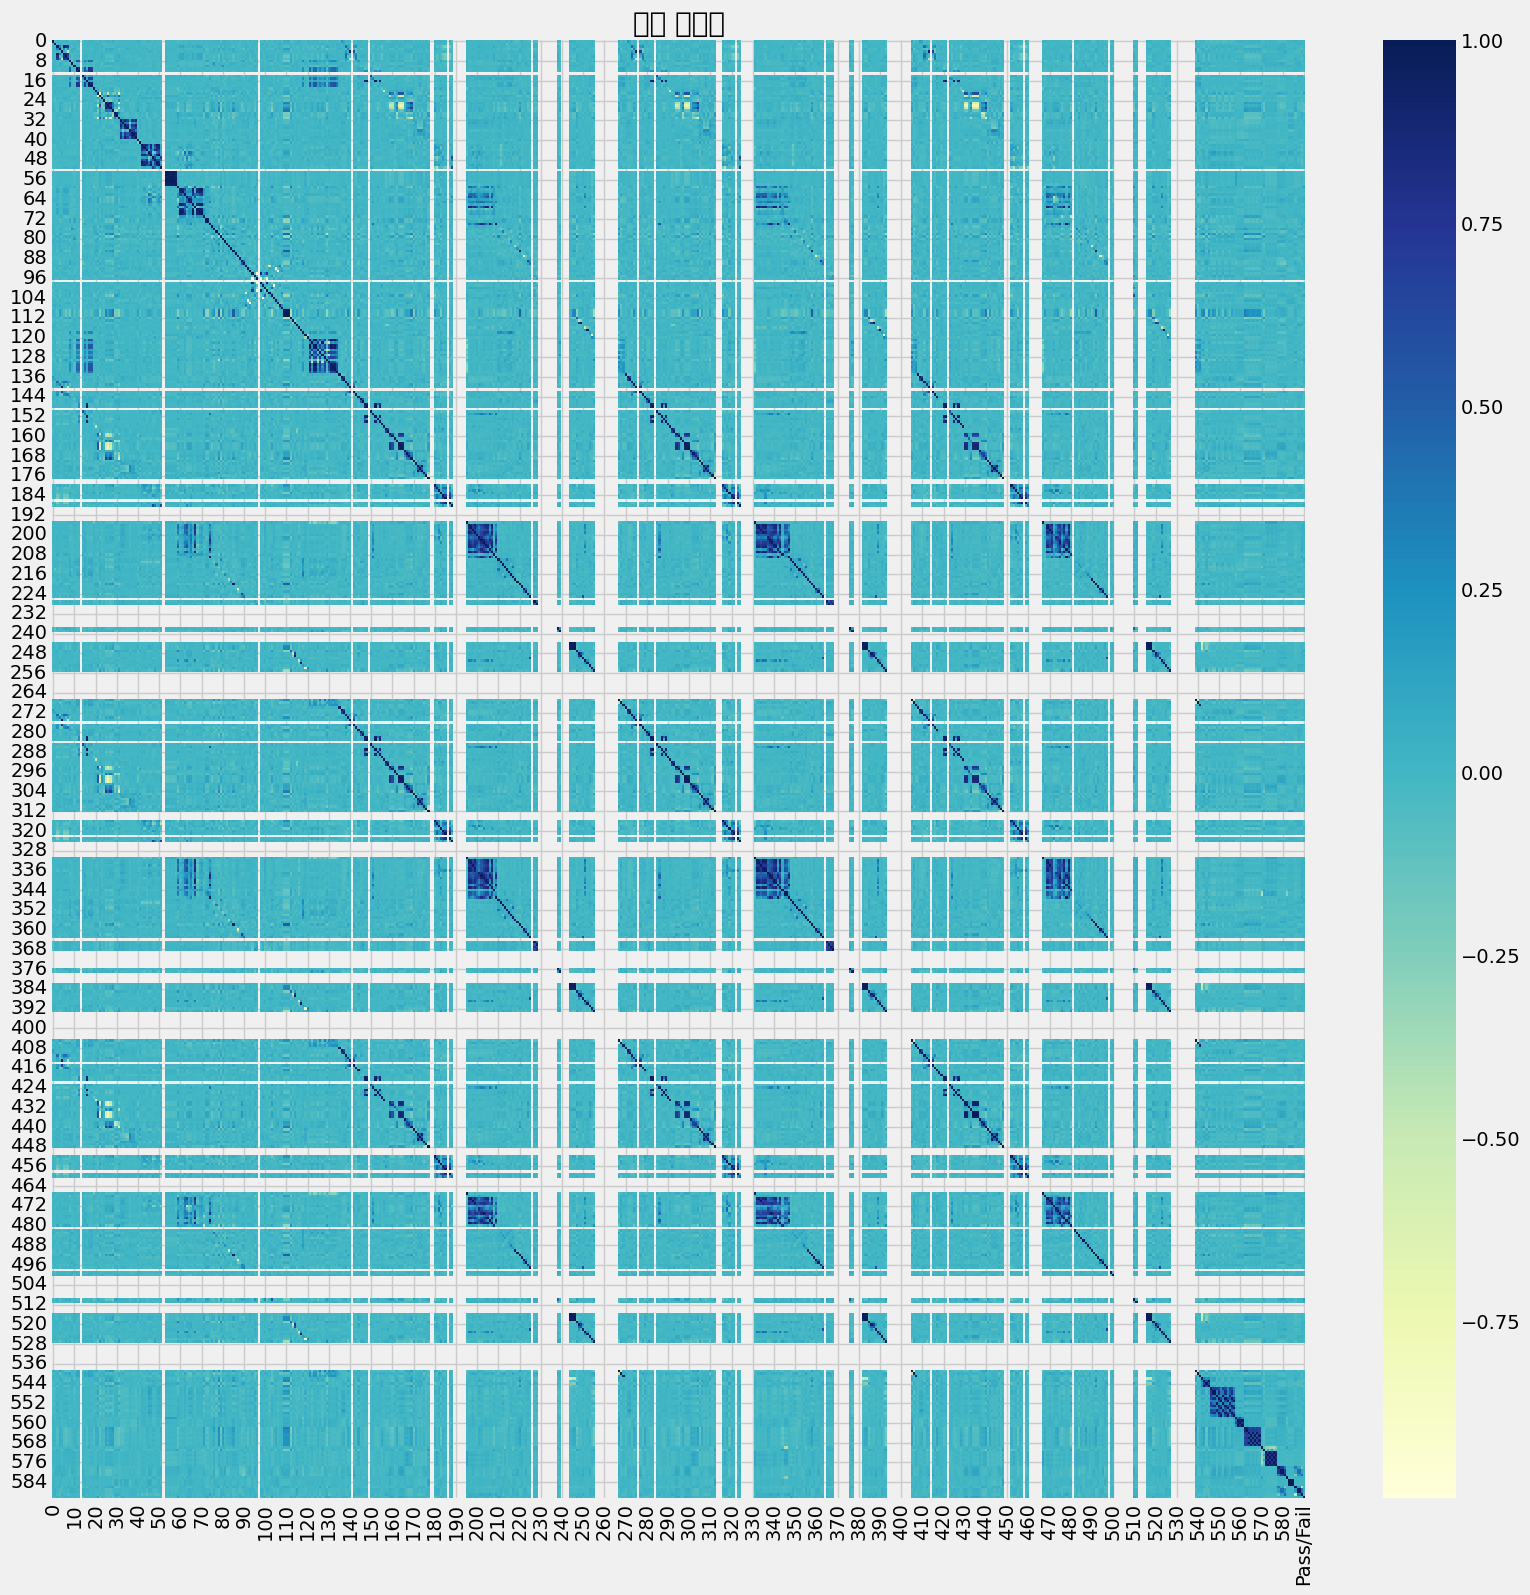

In [17]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "YlGnBu")
plt.title('상관 히트맵', fontsize = 20)

#### 2) 상관계수

##### 상관계수 필터링 함수

> 입력한 상관계수 threshold 에 따라 Feature 들 필터링하는 함수 정의

In [18]:
# 상관계수 구하기
data.corr()

<ipython-input-18-6c7910c824c2>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,-0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,-0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.026117,0.002246,-0.067263,-0.016895,0.004106,...,0.431632,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,-0.002472


In [19]:
def remove_collinear_features(x, threshold):
    # 데이터프레임 x 의 상관계수 구하기
    corr_matrix = x.corr()
    # Pass / Fail 을 제외한 컬럼수
    iters = range(len(corr_matrix.columns) - 1)
    # 제거할 컬럼들 저장할 리스트
    drop_cols = []

    for i in iters:
        for j in range(i+1):

            # j행 (i+1)열 상관계수 가져오기
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            # 상관계수 셀의 컬럼명 가져오기
            col = item.columns
            # 상관계수 셀의 행 인덱스 가져오기
            row = item.index
            # 상관계수의 절대값
            val = abs(item.values)

            if val >= threshold:
                print(col.values[0], "열", row.values[0], "행의 상관계수 : ", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [20]:
threshold = 0.70
data = remove_collinear_features(data,threshold)

<ipython-input-19-2ae0fa084160>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



5 열 2 행의 상관계수 :  0.99
6 열 2 행의 상관계수 :  0.82
6 열 5 행의 상관계수 :  0.84
7 열 2 행의 상관계수 :  0.75
7 열 5 행의 상관계수 :  0.77
12 열 11 행의 상관계수 :  0.83
17 열 11 행의 상관계수 :  0.81
18 열 11 행의 상관계수 :  0.72
18 열 12 행의 상관계수 :  0.79
18 열 17 행의 상관계수 :  0.9
22 열 21 행의 상관계수 :  0.75
26 열 25 행의 상관계수 :  0.83
27 열 25 행의 상관계수 :  0.98
27 열 26 행의 상관계수 :  0.79
30 열 29 행의 상관계수 :  0.86
34 열 32 행의 상관계수 :  0.88
35 열 34 행의 상관계수 :  0.83
37 열 32 행의 상관계수 :  0.75
37 열 34 행의 상관계수 :  0.75
38 열 32 행의 상관계수 :  0.72
38 열 34 행의 상관계수 :  0.72
38 열 36 행의 상관계수 :  0.71
38 열 37 행의 상관계수 :  0.97
39 열 32 행의 상관계수 :  0.81
39 열 34 행의 상관계수 :  0.91
39 열 35 행의 상관계수 :  0.71
39 열 37 행의 상관계수 :  0.86
39 열 38 행의 상관계수 :  0.84
43 열 42 행의 상관계수 :  0.82
44 열 42 행의 상관계수 :  0.82
46 열 42 행의 상관계수 :  0.84
46 열 43 행의 상관계수 :  0.84
46 열 45 행의 상관계수 :  0.74
48 열 44 행의 상관계수 :  0.77
49 열 42 행의 상관계수 :  1.0
49 열 43 행의 상관계수 :  0.82
49 열 44 행의 상관계수 :  0.82
49 열 46 행의 상관계수 :  0.84
50 열 42 행의 상관계수 :  0.88
50 열 43 행의 상관계수 :  0.9
50 열 46 행의 상관계수 :  0.97
50 열 49 행의 상관계수 :  0.88
51 열 

In [21]:
data.shape

(1567, 308)

#### 3) 머신러닝 모델 입력 데이터 생성

In [22]:
# Time 컬럼 삭제
data = data.drop(columns = ['Time'], axis = 1)

In [23]:
data.shape

(1567, 307)

In [24]:
data.head()

,0,1,2,3,4,8,9,10,11,13,...,570,571,572,578,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,0.0,...,533.8500,2.1113,8.95,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,-0.0148,0.9627,0.0,...,535.0164,2.4335,5.92,0.0096,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,0.0,...,535.0245,2.0293,11.21,0.0584,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,-0.0033,0.9629,0.0,...,530.5682,2.0253,9.33,0.0202,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,-0.0072,0.9569,0.0,...,532.0155,2.0275,8.83,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432,-1


### 5. Target Feature 불균형 문제 처리

#### 1. UnderSampling

> 데이터 탐색

In [25]:
# Pass 라벨이 1 인 데이터 개수 구하기
failed_tests = data[data['Pass/Fail'] == 1]
number_failed_tests = len(failed_tests)
print(number_failed_tests)

104


In [26]:
# Pass 라벨이 -1 인 데이터 개수 구하기
normal_indices = data[data['Pass/Fail'] == -1]
number_normal_indices = len(normal_indices)
print(number_normal_indices)

1463


In [27]:
#Pass 라벨(값이 1)에서 랜덤으로 104개 가져오기
###### 코드 작성 부분 시작 ######
random_normal_indices = np.random.choice(number_normal_indices, size = number_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)
###### 코드 작성 부분 마침######
print(len(random_normal_indices))

104


In [28]:
# Pass 라벨값이 -1인 데이터에서 Pass 라벨이 1 인 데이터 개수만큼 랜덤으로 가져오기
random_normal_indices = normal_indices.sample(n=number_failed_tests, replace = False)
print(random_normal_indices.shape)

(104, 307)


In [29]:
# 같은 비율로 합친 Pass/Fail 데이터 생성
under_sample = np.concatenate([failed_tests.index, random_normal_indices.index])
print(len(under_sample))

208


In [30]:
undersample_data = data.iloc[under_sample, :]

In [31]:
undersample_data['Pass/Fail'].value_counts()

 1    104
-1    104
Name: Pass/Fail, dtype: int64

In [32]:
x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail']
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 306)
(208, 1)


In [33]:
# 언더샘플링 데이터 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 306)
(145, 1)
(63, 306)
(63, 1)


In [34]:
# StandardScaler 적용
sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

#### 2. OverSampling using SMOTE

In [35]:
# SMOTE 적용
x_resample, y_resample  = SMOTE(random_state=1).fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(208, 306)
(208,)


In [36]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(145, 306)
(145, 1)
(63, 306)
(63, 1)


In [37]:
# standardScale 적용
sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

## 03. 머신러닝 모델링

### 1) 데이터 준비

In [38]:
data.head()

,0,1,2,3,4,8,9,10,11,13,...,570,571,572,578,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,0.0,...,533.8500,2.1113,8.95,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,-0.0148,0.9627,0.0,...,535.0164,2.4335,5.92,0.0096,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,0.0,...,535.0245,2.0293,11.21,0.0584,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,-0.0033,0.9629,0.0,...,530.5682,2.0253,9.33,0.0202,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,-0.0072,0.9569,0.0,...,532.0155,2.0275,8.83,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432,-1


In [39]:
x = data.iloc[:,:(data.shape[1]-1)]
y = data["Pass/Fail"]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 306)
shape of y: (1567,)


In [40]:
# 훈련/테스트 데이터 세트 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 306)
shape of x_test:  (471, 306)
shape of y_train:  (1096,)
shape of y_test:  (471,)


### 2) 다양한 Classifier 와 Grid Search 를 활용한 최적 모델 탐색



#### 1. Feature Scailing

In [41]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 선언
sc = StandardScaler()
# StandardScaler 에 fit_transform
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 2. XGBoost (Scaled 데이터)

In [43]:
xg = XGBClassifier(random_state=1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

ValueError: ignored

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", xg.score(x_test,y_test)*100)

#### 3. RandomForest (Scaled 데이터)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", rf.score(x_test,y_test)*100)

#### 4. Logistic Regression (Scaled 데이터)

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

#### 5. Lasso (Scaled 데이터)

In [ ]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

In [ ]:
# 예측값의 부호를 classifier 로 변환
y_pred2 = np.sign(y_pred)

In [ ]:
print("Accuracy: ", lasso.score(x_test,y_test)*100)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

### 3) 언더샘플링 데이터 대상 재모델링

#### 1. XGBoost (Undersampled 데이터)

In [ ]:
model = XGBClassifier(random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", model.score(x_test,y_test)*100)

#### 2. Grid Search - XGBoost (Undersampled 데이터)

In [ ]:
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

In [ ]:
# scale_pos_weights 사용
weights = (y == 0).sum()/(1.0*(y == -1).sum())

model = XGBClassifier(max_depth = 3, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

In [ ]:
print("Accuracy: ", model.score(x_test,y_test)*100)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

#### 2. Random Forest (Undersampled 데이터)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", model.score(x_test,y_test)*100)

#### 3. Logistic Regression (Undersampled 데이터)

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us)

In [ ]:
y_pred = lr.predict(x_test_us)

**Confusion matrix for Logistic Regression (Undersampled)**

In [ ]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

#### 4. Lasso (Undersampled 데이터)

In [ ]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)
#print ("Lasso model:", (lasso.coef_))

In [ ]:
y_pred = lasso.predict(x_test_us)

In [ ]:
print(y_pred)

In [ ]:
print(y_test_us)

In [ ]:
y_pred2 = np.sign(y_pred)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_us, y_pred2)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", lasso.score(x_test_us,y_test_us)*100)

### 4) 오버샘플링 데이터 대상 재모델링

#### 1. Grid Search - XGBoost (Oversampled 데이터)

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(x_train_os, y_train_os)
y_pred = model.predict(x_test_os)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(x_train_os, y_train_os)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

In [ ]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())

model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_os, y_train_os)
y_pred = model.predict(x_test_os)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_os, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, cmap = 'spring')

In [ ]:
print("Accuracy: ", model.score(x_test,y_test)*100)

#### 2. Random Forest (Oversampled 데이터)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_os, y_train_os)
y_pred = model.predict(x_test_os)
print("Accuracy: ", model.score(x_test_os,y_test_os)*100)

> Confusion Matrix

In [ ]:
# printing the confusion matrix
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

#### 3. Logistic Regression (Oversampled 데이터)

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_os, y_train_os)
y_pred = lr.predict(x_test_os)

print("Accuracy: ", lr.score(x_test_os,y_test_os)*100)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

### 5) PCA 를 활용한 차원 축소

In [ ]:
data.shape

#### 1. Scailing using zscore

In [ ]:
from scipy.stats import zscore
data_new=data.iloc[:,:306].apply(zscore)
data_new.head()

In [ ]:
data_new.isnull().any().any()

In [ ]:
data_new = data_new.replace(np.NaN, 0)

In [ ]:
data_new.isnull().any().any()

In [ ]:
x = data_new.iloc[:,:306]
y = data["Pass/Fail"]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

#### 2. PCA Step 1 - Covariance Matrix 만들기

In [ ]:
cov_matrix = np.cov(x.T)
print('Covariance Matrix \n%s', cov_matrix)

#### 3. PCA Step 2 - Eigen Values 와 Eigen Vector 만들기

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("누적 분산 설명력", cum_var_exp)

In [ ]:
plt.plot(var_exp)

> Explained Variance Ratio : 각각의 주성분 벡터가 이루는 축에 투영(projection)한 결과의 분산의 비율 (=각 eigenvalue 의 비율)

In [ ]:
# Ploting plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
len(cum_var_exp)

#### 4. Scikit-learn 으로 PCA 적용하기



In [ ]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=130)
data_reduced = pca.fit_transform(x)
data_reduced.transpose()

In [ ]:
pca.components_

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=list(x))
df_comp.head()

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

> PCA 적용된 데이터 탐색

In [ ]:
data_reduced.shape

In [ ]:
df_red2 = pd.DataFrame(data_reduced)
df_red2.head()

> Pass/Fail 데이터 합치기

In [ ]:
df_red3 = df_red2.copy()
df_red4 = df_red3
df_red4["Pass/Fail"] = data["Pass/Fail"]

In [ ]:
df_red4.head()

In [ ]:
df_red4.shape

#### 5. 이상치 제거

> Pass/Fail 별 PCA 데이터의 이상치 탐색

In [ ]:
df_red4.boxplot(column = [df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3],
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ]
                          , by = 'Pass/Fail', figsize=(20,20))

> 이상치 제거 적용 (Quantile, IQR 사용)

In [ ]:
pd_data = df_red4.copy()

from scipy import stats

def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])

In [ ]:
pd_data.boxplot( column =[df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3],
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ],by = 'Pass/Fail', figsize=(20,20))

### 6) PCA 적용+이상치 제거 데이터 재모델링

#### 1. 언더샘플링


In [ ]:
x = df_red4.iloc[:, df_red4.columns != 'Pass/Fail']
y = df_red4.iloc[:, df_red4.columns == 'Pass/Fail']

print("shape of x:", x.shape)
print("shape of y:", y.shape)

In [ ]:
failed_tests = np.array(df_red4[df_red4['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

In [ ]:
normal_indices = df_red4[df_red4['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

In [ ]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

In [ ]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

In [ ]:
undersample_data = df_red4.iloc[under_sample, :]

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail']
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

#### 1. XGBoost-PCA (Undersampled 데이터)

In [ ]:
model = XGBClassifier(random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

#### 2. Grid Search - XGBoost - PCA (Undersampled 데이터)

In [ ]:
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
             'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

In [ ]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())

model = XGBClassifier(max_depth = 4, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

#### 3. Random Forest - PCA (Undersampled 데이터)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [ ]:
print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

#### 3. Logistic Regression - PCA (Undersampled 데이터)

In [ ]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us)
y_pred = lr.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

In [ ]:
print("Accuracy: ", lr.score(x_test_us,y_test_us)*100)

#### 4. Lasso - PCA (Undersampled 데이터)

In [ ]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)

y_pred = lasso.predict(x_test_us)

y_pred2 = np.sign(y_pred)

In [ ]:
actual_cost = list(y_test_us)
actual_cost = np.asarray(actual_cost)
y_pred_lass = lasso.predict(x_test_us)

In [ ]:
print("Accuracy: ", lasso.score(x_test_us, y_test_us)*100)

> Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test_us, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

### Feature Importances

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train_us, y_train_us)

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pio.renderers
pio.renderers.default = 'colab'
pio.renderers

trace = go.Scatter(
    y = model.feature_importances_,
    x = x_train_us.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = model.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = x_train_us.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')